In [74]:
import numpy as np
import pandas as pd
import re

In [75]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [76]:
df = pd.read_csv('mandar_gurgaon_properties_cleaned_v1.csv')

In [77]:
df.duplicated().sum()

122

In [78]:
df.head(1)
# here in this file the focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),2,2,1,not available,5.0,East,undefined,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']",NaN,NaN


## 1. areaWithType

for this we will have to make 3 new columns from areaWithType column - ie Super Built up area, Built up area, Carpet area

In [79]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1387,9.50,4050.0,Plot area 502(419.74 sq.m.)Built Up area: 500 sq.yards (418.06 sq.m.)Carpet area: 450 sq.yards (376.26 sq.m.)
2625,9.25,3240.0,Plot area 3240(301.01 sq.m.)Built Up area: 5000 sq.ft. (464.52 sq.m.)Carpet area: 4500 sq.ft. (418.06 sq.m.)
2502,2.50,1550.0,Super Built up area 1550(144 sq.m.)
3661,1.50,2150.0,Super Built up area 2150(199.74 sq.m.)Built Up area: 1797 sq.ft. (166.95 sq.m.)Carpet area: 1670 sq.ft. (155.15 sq.m.)
511,1.00,2023.0,Super Built up area 2025(188.13 sq.m.)


In [80]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [81]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [82]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [83]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area) # extracting the values
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1) # converting them to sqft if needed

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [84]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3492,6.80,house,2160.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN
3048,1.60,flat,1380.0,Carpet area: 1380 (128.21 sq.m.),NaN,NaN,1380.0
2312,0.45,flat,956.0,Carpet area: 850 (78.97 sq.m.),NaN,NaN,850.0
945,0.21,flat,302.0,Carpet area: 302 (28.06 sq.m.),NaN,NaN,302.0
2822,1.30,flat,1440.0,Super Built up area 1440(133.78 sq.m.),1440.0,NaN,NaN


In [85]:
df.duplicated().sum()

122

In [86]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2174,1.99,flat,1380.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1285 sq.ft. (119.38 sq.m.)Carpet area: 1280 sq.ft. (118.92 sq.m.),1380.0,1285.0,1280.00
1730,2.50,flat,1711.0,Super Built up area 1711(158.96 sq.m.)Built Up area: 1480 sq.ft. (137.5 sq.m.)Carpet area: 1111.44 sq.ft. (103.26 sq.m.),1711.0,1480.0,1111.44
2760,1.26,flat,1738.0,Super Built up area 1735(161.19 sq.m.)Built Up area: 1400 sq.ft. (130.06 sq.m.)Carpet area: 965 sq.ft. (89.65 sq.m.),1735.0,1400.0,965.00
382,3.40,flat,2410.0,Super Built up area 2410(223.9 sq.m.)Built Up area: 2210 sq.ft. (205.32 sq.m.)Carpet area: 2040 sq.ft. (189.52 sq.m.),2410.0,2210.0,2040.00
3753,4.25,flat,3763.0,Super Built up area 3763(349.59 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2800 sq.ft. (260.13 sq.m.),3763.0,3000.0,2800.00


In [87]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape
# this means there are only 534 flats which have all these 3 values


(534, 7)

In [88]:
# these are those rows where there is plot area
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,12.50,house,3060.0,Plot area 470(392.98 sq.m.)Built Up area: 410 sq.yards (342.81 sq.m.)Carpet area: 340 sq.yards (284.28 sq.m.),NaN,410.0,340.0
7,3.65,house,3450.0,Plot area 3450(320.52 sq.m.),NaN,NaN,NaN
8,5.50,house,3240.0,Plot area 360(301.01 sq.m.)Built Up area: 355 sq.yards (296.83 sq.m.)Carpet area: 300 sq.yards (250.84 sq.m.),NaN,355.0,300.0
13,0.80,house,100.0,Plot area 100(9.29 sq.m.),NaN,NaN,NaN
14,4.25,house,1620.0,Plot area 180(150.5 sq.m.),NaN,NaN,NaN


In [89]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [90]:
# all_nan_df contains those values where all the 3 columns have missing values
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [91]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,3.65,house,3450.0,Plot area 3450(320.52 sq.m.),NaN,NaN,NaN
13,0.80,house,100.0,Plot area 100(9.29 sq.m.),NaN,NaN,NaN
14,4.25,house,1620.0,Plot area 180(150.5 sq.m.),NaN,NaN,NaN
15,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,NaN,NaN
19,0.34,house,270.0,Plot area 270(25.08 sq.m.),NaN,NaN,NaN


In [92]:
# storing their index also
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [93]:
# Here we can observe that all the 3 columns have null values when there is plot area involved. Plot area is very similar to built-up area
# so we will store plot area in built up area

In [94]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [95]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [96]:
all_nan_df

# it has some values in built_up_area in the form of yards also, so we need to bring it on a same scale
# 1 sqft = 9 x sq.yard
# 1 sqft = 10.7 x sq.mt

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,3.65,house,3450.0,Plot area 3450(320.52 sq.m.),NaN,3450.00,NaN
13,0.80,house,100.0,Plot area 100(9.29 sq.m.),NaN,100.00,NaN
14,4.25,house,1620.0,Plot area 180(150.5 sq.m.),NaN,180.00,NaN
15,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,1160.00,NaN
19,0.34,house,270.0,Plot area 270(25.08 sq.m.),NaN,270.00,NaN
20,0.45,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
26,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.00,NaN
41,8.90,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
42,3.55,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.00,NaN
44,4.35,house,1836.0,Plot area 204(170.57 sq.m.),NaN,204.00,NaN


In [97]:
# it has some values in built_up_area in the form of yards also, so we need to bring it on a same scale
# 1 sqft = 9 x sq.yard
# 1 sqft = 10.7 x sq.mt

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:  # agar unka factor divide karne par 9 aata hai toh iska matlab hamare pass value sq.yard mein hai
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0: # agar unka factor divide karne par 11 aata hai toh iska matlab hamare pass value sq.mt mein hai
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']  #agar dono case nahi hote toh iska matlab voh value already sqft mein hai

In [98]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [99]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
7,3.65,house,3450.0,Plot area 3450(320.52 sq.m.),NaN,3450.00,NaN
13,0.80,house,100.0,Plot area 100(9.29 sq.m.),NaN,100.00,NaN
14,4.25,house,1620.0,Plot area 180(150.5 sq.m.),NaN,1620.00,NaN
15,0.70,house,1160.0,Plot area 1160(107.77 sq.m.),NaN,1160.00,NaN
19,0.34,house,270.0,Plot area 270(25.08 sq.m.),NaN,270.00,NaN
20,0.45,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
26,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,1449.00,NaN
41,8.90,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
42,3.55,house,1449.0,Plot area 161(134.62 sq.m.),NaN,1449.00,NaN
44,4.35,house,1836.0,Plot area 204(170.57 sq.m.),NaN,1836.00,NaN


In [100]:
# update the original dataframe
df.update(all_nan_df)

In [101]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [102]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),2,2,1,not available,5.0,East,undefined,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']",NaN,NaN,NaN,1239.0,1100.0
1,flat,ireo skyon,sector 60,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up area: 1250 sq.ft. (116.13 sq.m.)Carpet area: 921 sq.ft. (85.56 sq.m.),2,3,2,servant room,5.0,East,1 to 5 Year Old,"['Sector 55-56 Metro', 'Golf Course Extension', 'Adarsh Senior Secondary School', 'Swastik Hospital Sec 66', 'IGI Airport', 'Surajgarh Gurgaon, Golf Course Ext Rd', 'International Tech Park Gurgaon,']","['5 Wardrobe', '3 Fan', '2 Geyser', '1 Stove', '5 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1524.0,1250.0,921.0
2,flat,dlf regal gardens,sector 90,1.23,7052.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,others,19.0,North,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,['Maintenance Staff'],1744.0,NaN,NaN
3,house,independent,sector 2,5.00,15384.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,not available,1.0,South,undefined,NaN,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,NaN,3250.0
4,flat,dlf the arbour,sector 63,7.52,19000.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),4,4,3,not available,15.0,West,undefined,"['Radhakrishna Shani Mandir', 'pracksht hospital', 'Vatsalya Clinic', 'SPAZE BUSINESS PARK', 'International Tech Park', 'Intellion Park', 'Hdfc bank', 'Hdfc bank and atm', 'Pizza Hut', 'Madison and Pike']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,3956.0,2200.0


## 2.additionalRoom

In [103]:
df['additionalRoom'].value_counts()
# isko break karenge different types of additional rooms mein like one hot encoding
# new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']


additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [104]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [105]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1070,servant room,0,1,0,0,0
1967,not available,0,0,0,0,0
177,not available,0,0,0,0,0
903,not available,0,0,0,0,0
3790,not available,0,0,0,0,0


In [106]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),2,2,1,not available,5.0,East,undefined,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']",NaN,NaN,NaN,1239.0,1100.0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up area: 1250 sq.ft. (116.13 sq.m.)Carpet area: 921 sq.ft. (85.56 sq.m.),2,3,2,servant room,5.0,East,1 to 5 Year Old,"['Sector 55-56 Metro', 'Golf Course Extension', 'Adarsh Senior Secondary School', 'Swastik Hospital Sec 66', 'IGI Airport', 'Surajgarh Gurgaon, Golf Course Ext Rd', 'International Tech Park Gurgaon,']","['5 Wardrobe', '3 Fan', '2 Geyser', '1 Stove', '5 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1524.0,1250.0,921.0,0,1,0,0,0
2,flat,dlf regal gardens,sector 90,1.23,7052.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,others,19.0,North,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,['Maintenance Staff'],1744.0,NaN,NaN,0,0,0,0,1
3,house,independent,sector 2,5.00,15384.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,not available,1.0,South,undefined,NaN,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,NaN,3250.0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,19000.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),4,4,3,not available,15.0,West,undefined,"['Radhakrishna Shani Mandir', 'pracksht hospital', 'Vatsalya Clinic', 'SPAZE BUSINESS PARK', 'International Tech Park', 'Intellion Park', 'Hdfc bank', 'Hdfc bank and atm', 'Pizza Hut', 'Madison and Pike']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,3956.0,2200.0,0,0,0,0,0


## 3.agePossession

In [107]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
Jul 2024                 4
Sep 2023                 4
By 2025                  4
Oct 2023                 4
Aug 2024                 4
May 2024                 3
Nov 2024                 3
Jan 2025                 3
Feb 2024                 3
Jan 2026                 2
Jul 2025                 2
Dec 2026                 2
Jul 2027                 2
Apr 2026                 2
Oct 2025                 2
Sep 2025                 2
Mar 2025                 2
Aug 2025      

In [108]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For future entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [109]:
# here we are just categorizing the age of the plot or flat
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [110]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [111]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),2,2,1,not available,5.0,East,Undefined,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']",NaN,NaN,NaN,1239.0,1100.0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up area: 1250 sq.ft. (116.13 sq.m.)Carpet area: 921 sq.ft. (85.56 sq.m.),2,3,2,servant room,5.0,East,Relatively New,"['Sector 55-56 Metro', 'Golf Course Extension', 'Adarsh Senior Secondary School', 'Swastik Hospital Sec 66', 'IGI Airport', 'Surajgarh Gurgaon, Golf Course Ext Rd', 'International Tech Park Gurgaon,']","['5 Wardrobe', '3 Fan', '2 Geyser', '1 Stove', '5 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1524.0,1250.0,921.0,0,1,0,0,0
2,flat,dlf regal gardens,sector 90,1.23,7052.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,others,19.0,North,Relatively New,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,['Maintenance Staff'],1744.0,NaN,NaN,0,0,0,0,1
3,house,independent,sector 2,5.00,15384.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,not available,1.0,South,Undefined,NaN,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,NaN,3250.0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,19000.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),4,4,3,not available,15.0,West,Undefined,"['Radhakrishna Shani Mandir', 'pracksht hospital', 'Vatsalya Clinic', 'SPAZE BUSINESS PARK', 'International Tech Park', 'Intellion Park', 'Hdfc bank', 'Hdfc bank and atm', 'Pizza Hut', 'Madison and Pike']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,3956.0,2200.0,0,0,0,0,0


## 4.furnishDetails

In [112]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3429,"['3 Wardrobe', '3 Fan', '4 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Centrally Air Conditioned', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1726,"['5 Fan', '1 Exhaust Fan', '9 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2783,"['1 Wardrobe', '3 Fan', '3 Light', '2 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking']"
1808,NaN,NaN
3551,"['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Stove', '3 Light', '3 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting', 'Water softening plant']"


In [113]:
text = "['5 Fan', '1 Exhaust Fan', '1 Geyser', '5 Light', '4 AC', '1 Curtains', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']"
text.replace('[', '').replace(']', '').replace("'", "").split(', ')

['5 Fan',
 '1 Exhaust Fan',
 '1 Geyser',
 '5 Light',
 '4 AC',
 '1 Curtains',
 'No Bed',
 'No Chimney',
 'No Dining Table',
 'No Modular Kitchen',
 'No Microwave',
 'No Fridge',
 'No Sofa',
 'No Stove',
 'No TV',
 'No Wardrobe',
 'No Washing Machine',
 'No Water Purifier']

In [114]:
# Extract all unique furnishings from the furnishDetails column
# its like doing one hot encoding for all the furnishable items
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [115]:
furnishings_df.shape

(3803, 19)

In [116]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_50704\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [117]:
furnishings_df.sample(5)

,AC,Geyser,Fan,Chimney,Modular Kitchen,Water Purifier,Exhaust Fan,Curtains,Wardrobe,Light,Sofa,Bed,TV,Fridge,Dining Table,Washing Machine,Stove,Microwave
3588,5,4,5,1,1,0,1,0,4,10,0,0,0,0,0,0,0,0
3302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1099,1,1,1,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0


## Now we don't want to keep these many columns in our dataset, so we will group them into furnished, semi-furnished and unfurnished. Now how to group them?

we don't know any specific standards to decide furnished or semi-furnished or unfurnished. Therefore we will use k-means clustering for this

In [118]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [119]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [120]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

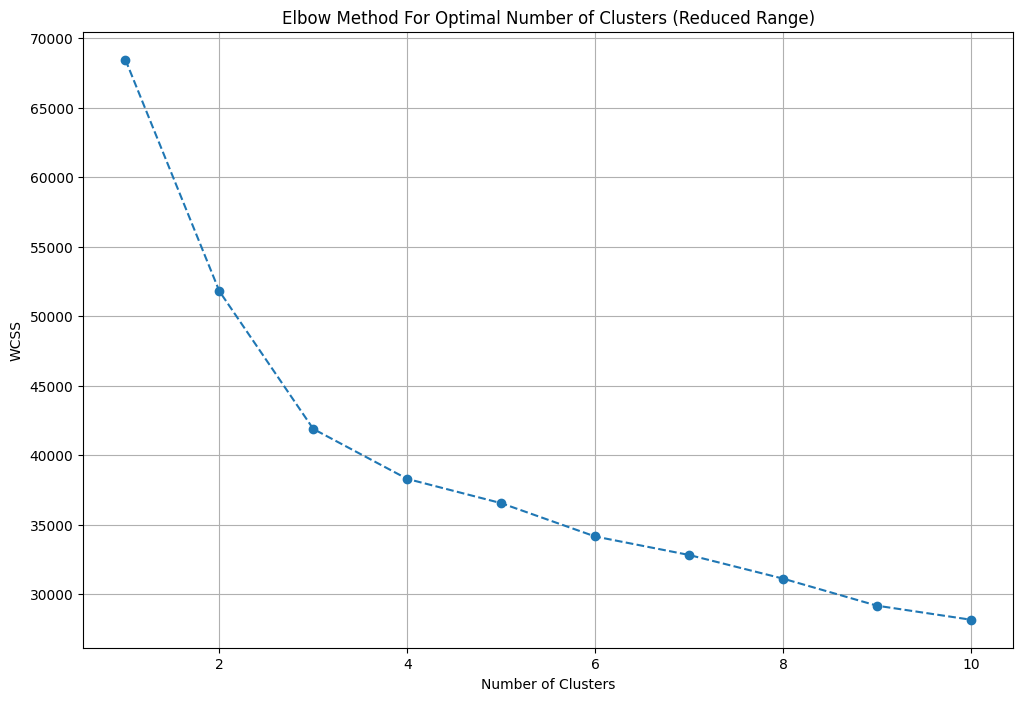

In [121]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [122]:
# the elbow is formed at n=3 clusters. So we will train a k-means model with 3 clusters in it named furnished, semi-furnished, unfurnished

n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [124]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,AC,Geyser,Fan,Chimney,Modular Kitchen,Water Purifier,Exhaust Fan,Curtains,Wardrobe,Light,Sofa,Bed,TV,Fridge,Dining Table,Washing Machine,Stove,Microwave
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),2,2,1,not available,5.0,East,Undefined,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']",NaN,NaN,NaN,1239.0,1100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up area: 1250 sq.ft. (116.13 sq.m.)Carpet area: 921 sq.ft. (85.56 sq.m.),2,3,2,servant room,5.0,East,Relatively New,"['Sector 55-56 Metro', 'Golf Course Extension', 'Adarsh Senior Secondary School', 'Swastik Hospital Sec 66', 'IGI Airport', 'Surajgarh Gurgaon, Golf Course Ext Rd', 'International Tech Park Gurgaon,']","['5 Wardrobe', '3 Fan', '2 Geyser', '1 Stove', '5 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1524.0,1250.0,921.0,0,1,0,0,0,4,2,3,1,1,0,0,0,5,5,0,0,0,0,0,0,1,0
2,flat,dlf regal gardens,sector 90,1.23,7052.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,others,19.0,North,Relatively New,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,['Maintenance Staff'],1744.0,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,house,independent,sector 2,5.00,15384.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,not available,1.0,South,Undefined,NaN,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,NaN,3250.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,19000.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),4,4,3,not available,15.0,West,Undefined,"['Radhakrishna Shani Mandir', 'pracksht hospital', 'Vatsalya Clinic', 'SPAZE BUSINESS PARK', 'International Tech Park', 'Intellion Park', 'Hdfc bank', 'Hdfc bank and atm', 'Pizza Hut', 'Madison and Pike']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,3956.0,2200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [125]:
# this removes the last 18 columns which we added related to furnishings from the dataframe 
df = df.iloc[:,:-18]

In [126]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),2,2,1,not available,5.0,East,Undefined,"['Proposed Metro Station', 'Mahapal Shing', 'National Highway 8', 'IGD Primary Health Care', 'HDFC Bank', 'PCL Logistics', 'JW Mariott']",NaN,NaN,NaN,1239.0,1100.0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up area: 1250 sq.ft. (116.13 sq.m.)Carpet area: 921 sq.ft. (85.56 sq.m.),2,3,2,servant room,5.0,East,Relatively New,"['Sector 55-56 Metro', 'Golf Course Extension', 'Adarsh Senior Secondary School', 'Swastik Hospital Sec 66', 'IGI Airport', 'Surajgarh Gurgaon, Golf Course Ext Rd', 'International Tech Park Gurgaon,']","['5 Wardrobe', '3 Fan', '2 Geyser', '1 Stove', '5 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1524.0,1250.0,921.0,0,1,0,0,0
2,flat,dlf regal gardens,sector 90,1.23,7052.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,others,19.0,North,Relatively New,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,['Maintenance Staff'],1744.0,NaN,NaN,0,0,0,0,1
3,house,independent,sector 2,5.00,15384.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,not available,1.0,South,Undefined,NaN,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,NaN,3250.0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,19000.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.),4,4,3,not available,15.0,West,Undefined,"['Radhakrishna Shani Mandir', 'pracksht hospital', 'Vatsalya Clinic', 'SPAZE BUSINESS PARK', 'International Tech Park', 'Intellion Park', 'Hdfc bank', 'Hdfc bank and atm', 'Pizza Hut', 'Madison and Pike']","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,3956.0,2200.0,0,0,0,0,0


In [127]:
df['furnishing_type'] = cluster_assignments

In [135]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
60,"['1 Bed', '5 Wardrobe', '1 Water Purifier', '4 Fan', '1 Sofa', '1 Exhaust Fan', '6 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Washing Machine']",1
1951,"['1 Bed', '1 Light', '1 AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
1342,"['1 Water Purifier', '10 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', '4 Bed', '5 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No Stove', 'No TV']",2
3533,"['7 Fan', '1 Exhaust Fan', '5 Geyser', '1 Stove', '10 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '5 Wardrobe', '1 Microwave', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
1371,[],0


## 5.features

In [148]:
# this contains null values also. So we can do one thing that we can see the society name 
# which has null values in another dataset named apartments. 
# if we find the same society there, then we can copy the ammenities mentioned there in this dataframe
df[['society','features']].sample(5)

,society,features
3461,dlf the ultima,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3659,independent,NaN
822,ramsons kshitij,NaN
3712,alpha corp gurgaonone,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Separate entry for servant room', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Waste Disposal', 'Water softening plant']"
210,emaar mgf emerald floors premier,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [149]:
df['features'].isnull().sum()

635

In [150]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [151]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [152]:
temp_df = df[df['features'].isnull()] # extracting those features which have null values

In [153]:
temp_df.shape

(635, 26)

In [154]:
# here we are merging them and if we find the same society there, then we can copy the ammenities mentioned there in this dataframe
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [155]:
df.loc[temp_df.index,'features'] = x.values

In [156]:
df['features'].isnull().sum()

481

In [158]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [160]:
# now here there are 130 different ammenities here. So we can make 130 new columns telling about each amenity. It will be binary columns 
# so for each flat we will have a 130 dimensional vector
# now we can create clusters from these vectors into categories, ie eg luxury flat, semi-luxury flat, budget flat etc

# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# df['features_list']

In [161]:
# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [163]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3523,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
2239,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0
2462,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
3198,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [164]:
features_binary_df.shape

(3803, 130)

In [168]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

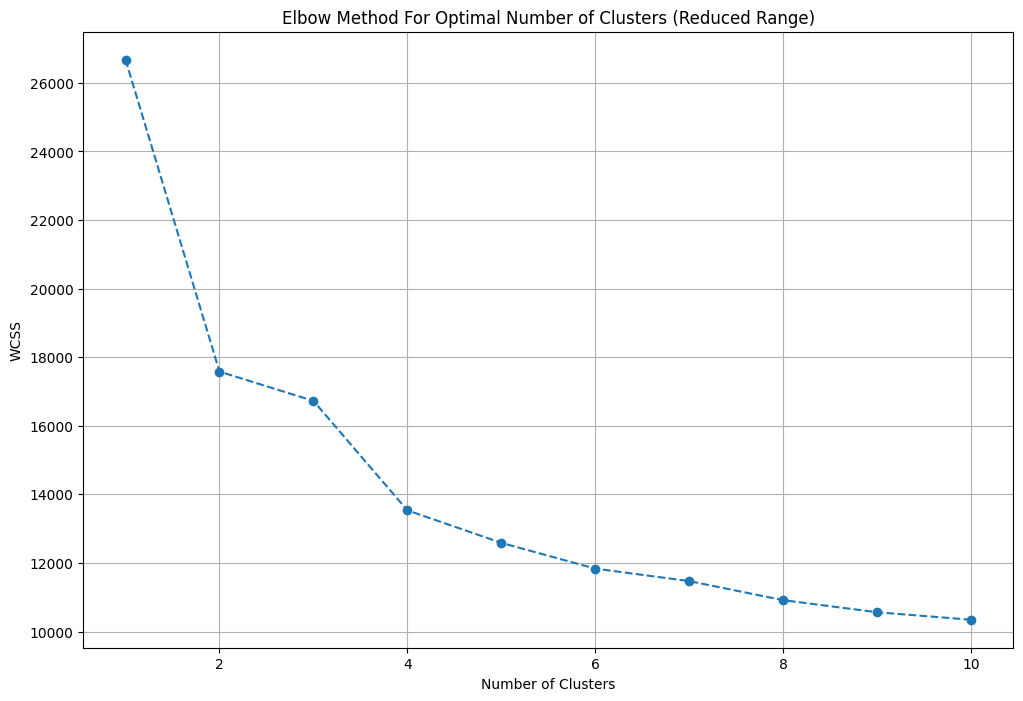

In [169]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [170]:
# this k-means clustering is saying that 2 clusters will be sufficient. But after checking, the 2 clusters were not good. So we will change the approach

In [172]:
# ie hum ek luxury score denge har feature ya amenities ke liye. Fir uske liye humne ek weight assign kiya ki us amenity ka kya luxury score hai

In [173]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [174]:
df['luxury_score'] = luxury_score

In [180]:
# jitna jyada luxury score utna jyada voh apartment luxurious hai, aur jitna kam hai utna budget apartment hai

In [178]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
225,house,sector 14 rwa,sector 14,5.51,16990.0,3243.0,Plot area 361(301.84 sq.m.),3,3,2,not available,4.0,South-West,Moderately Old,"['Sheetla Mata Mandir', 'Hanuman Mandir', 'Hsbc bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Nagpal Nursing Home Gurgaon', 'Kalyani Hospital Gurgaon', 'Saraswati Hospital Gurgaon', 'Kishor Clinic', 'Sheetla Clinic', 'Apollo Cradle Hospital Gurgaon', 'Dr. Babita Sharma', 'Nidhi Clinic', 'Lotus Hospital Gurgaon', 'Children Hospital', 'Mamta Hospital Gurgaon', 'Dr. Tomar Clinic', 'Jeevan Jyoti Hospital Gurgaon', 'Sangwan Hospital Gurgaon', 'Ahmed Hospital Multi Speciality', 'Jackson Hospital', 'Ahooja Eye and Dental Institute Hospital', 'Dr. Sandeep Chauhan', 'Dental Health Centre', 'M Goel Hospital', 'Nova Care Clinic', 'GH Gurgaon', 'Sector-14 Market', 'Indian Oil', 'IBP Petrol Pump', 'Standard chartered bank', 'Icici bank', 'Hdfc bank', 'Oriental bank of commerce', 'Karur vysay bank', 'Catholic syrian bank', 'State bank of india sbi', 'Punjab national bank', 'Rang Parivartan', 'Cafe Coffee Day', '32nd Milestone', 'Dhabba', 'Cafe Coffee Day', 'Ardor 29', 'ADDA', 'Salvan Public School', 'Management Development Institute', 'Lieutenant Atul Kataria School', 'govt sec school', 'District library gurgaon']",NaN,"['High Ceiling Height', 'Maintenance Staff', 'Bank Attached Property']",NaN,3249.0,NaN,0,0,0,0,0,0,"[High Ceiling Height, Maintenance Staff, Bank Attached Property]",14
2439,flat,godrej summit,sector 104,0.82,9854.0,832.0,Carpet area: 77.31,2,2,3,study room,12.0,NaN,Relatively New,"['MG Road Metro Station', 'The Esplanade Mall', 'Dhanwapur Road', 'Dwarka Expy', 'Blue Bells Model School', 'The NorthCap University', 'Aryan Hospital', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station', 'Oswal buildings, Udyog Vihar', 'Altrade Business Centre', 'Country Inn & Suites by Radisson', 'Appu Ghar', 'Hamoni Golf Camp', 'Nehru Stadium']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",NaN,NaN,77.31,1,0,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, No open drainage around, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Internet/wi-fi connectivity, Airy Rooms, Spacious Interiors, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",120
2228,flat,supertech araville,sector 79,0.90,5883.0,1530.0,Super Built up area 1530(142.14 sq.m.)Built Up area: 1450 sq.ft. (134.71 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),2,2,3,study room,5.0,NaN,Relatively New,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]",[],"['Lift(s)', 'Intercom Facility', 'Security / Fire Alarm', 'Swimming Pool', 'Park', 'Maintenance Staff', 'Visitor Parking', 'Club house / Community Center', 'Fitness Centre / GYM']",1530.0,1450.0,1400.00,1,0,0,0,0,0,"[Lift(s), Intercom Facility, Security / Fire Alarm, Swimming Pool, Park, Maintenance Staff, Visitor Parking, Club house / Community Center, Fitness Centre / GYM]",53
3597,flat,tulip violet,sector 69,1.51,9569.0,1578.0,Super Built up area 1578(146.6 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),3,3,2,pooja room,0.0,West,Relatively N

In [182]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [183]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1283,flat,signature global synera,sector 81,0.49,6666.0,735.0,Super Built up area 735(68.28 sq.m.)Built Up area: 700 sq.ft. (65.03 sq.m.)Carpet area: 635 sq.ft. (58.99 sq.m.),2,2,3,5.0,South,Relatively New,735.0,700.0,635.0,0,0,0,0,0,0,117
82,house,unitech palms south city 1,sector 41,9.35,28858.0,3240.0,Plot area 3240(301.01 sq.m.)Built Up area: 7500 sq.ft. (696.77 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),10,10,3+,4.0,North-East,Moderately Old,NaN,7500.0,6000.0,1,1,0,0,0,1,70
2675,flat,m3m heights,sector 65,2.50,13600.0,1838.0,Super Built up area 1828(169.83 sq.m.),3,3,3,19.0,NaN,Under Construction,1828.0,NaN,NaN,0,0,0,0,0,0,48
1970,flat,emaar palm gardens,sector 83,1.35,12325.0,1095.0,Super Built up area 1720(159.79 sq.m.)Carpet area: 1095.3 sq.ft. (101.76 sq.m.),3,3,3,7.0,South-West,Relatively New,1720.0,NaN,1095.3,0,1,0,0,0,0,24
1904,flat,m3m merlin,sector 67,2.80,13671.0,2048.0,Super Built up area 2048(190.27 sq.m.),3,3,3,2.0,East,Relatively New,2048.0,NaN,NaN,0,0,1,0,0,2,174


In [184]:
df.shape

(3803, 23)

In [185]:
df.to_csv('mandar_gurgaon_properties_cleaned_v2.csv',index=False)